In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
import random
import numpy as np
import pandas as pd
import mxnet as mx
import matplotlib.pyplot as plot


ModuleNotFoundError: No module named 'mxnet'

In [2]:
digi_train_df = pd.read_csv('D:\System\Documents\GitKraken\CS4661\src\project\train.csv')
digi_train_df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
digi_test_df = pd.read_csv('D:\System\Documents\GitKraken\CS4661\src\project\test.csv')
digi_test_df.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(digi_train_df.shape, digi_test_df.shape)


(42000, 785) (28000, 784)


In [5]:
X = digi_train_df.iloc[:, 1:]
X.shape
X.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = digi_train_df.iloc[:, 0]
y.shape
y.head()


0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

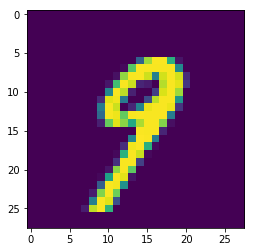

In [7]:
#Random Number Pick
for i in range(28):
    temp = X.values[i].reshape((28, 28)).astype('uint8')
    temp.shape
plot.imshow(temp)
#temp.head()


<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, *, data=None, **kwargs)>

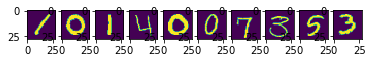

In [ ]:
#PLotting Number 1 - 10 from Data
% matplotlib inline
for i in range(10):
    plot.subplot(1, 10, i + 1)
    plot.imshow(X.values[i].reshape((28, 28)))
plot.imshow


1009


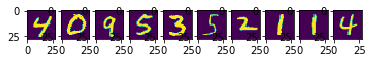

In [ ]:
#Random Number Gen picking Random Number from Data
for i in range(10):
    temprandom = random.randint(1,5000)
    plot.subplot(1,10,i+1)
    plot.imshow(X.values[temprandom].reshape((28,28)))
plot.imshow
print(temprandom)

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


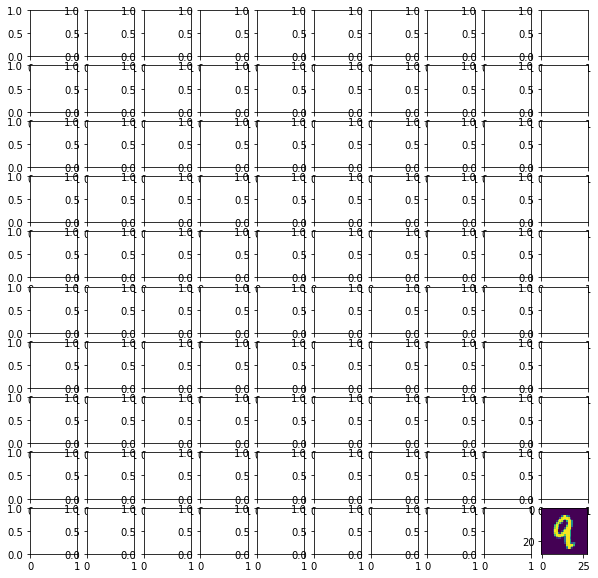

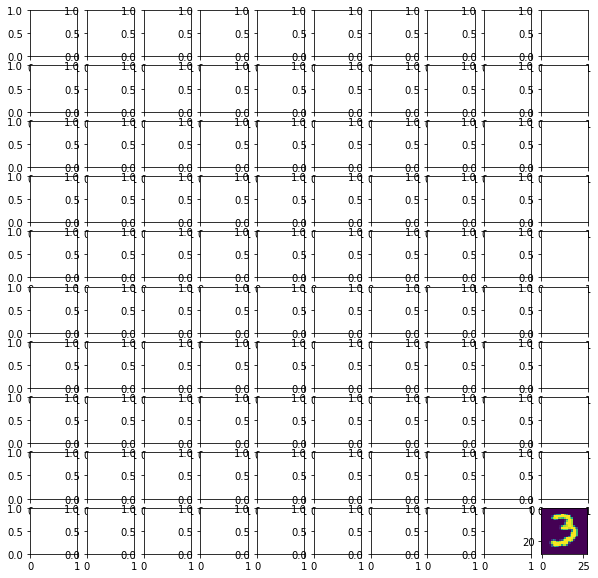

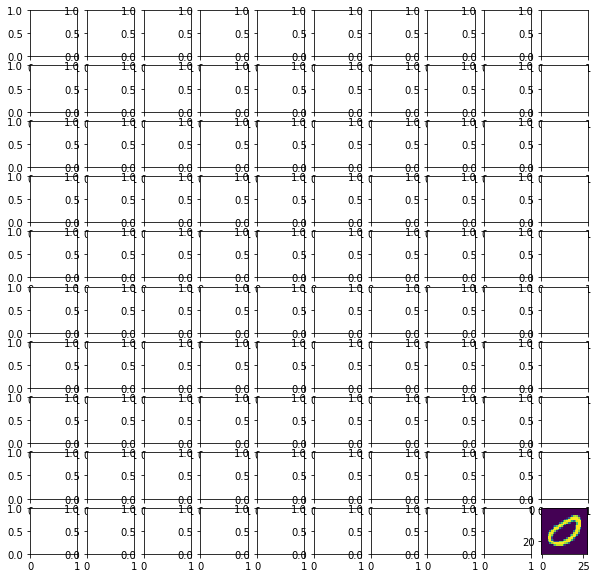

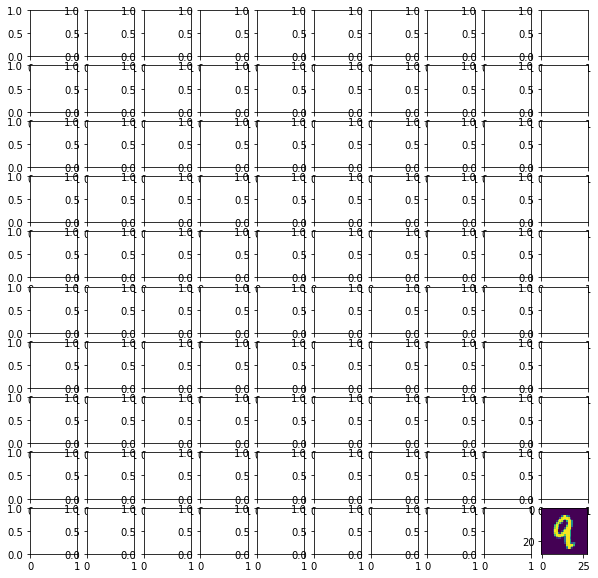

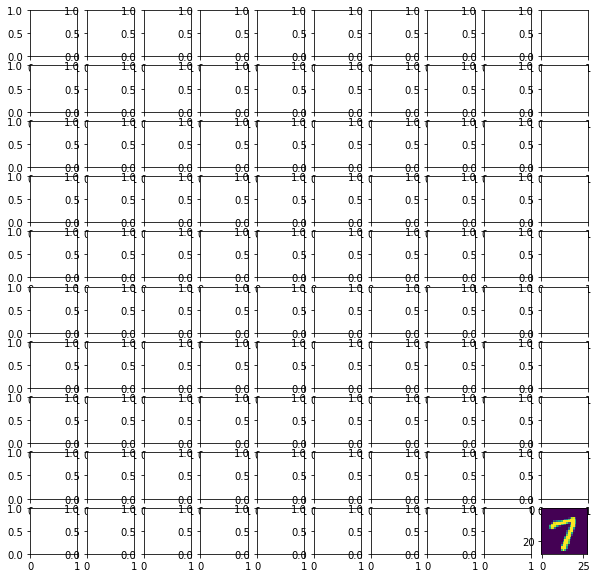

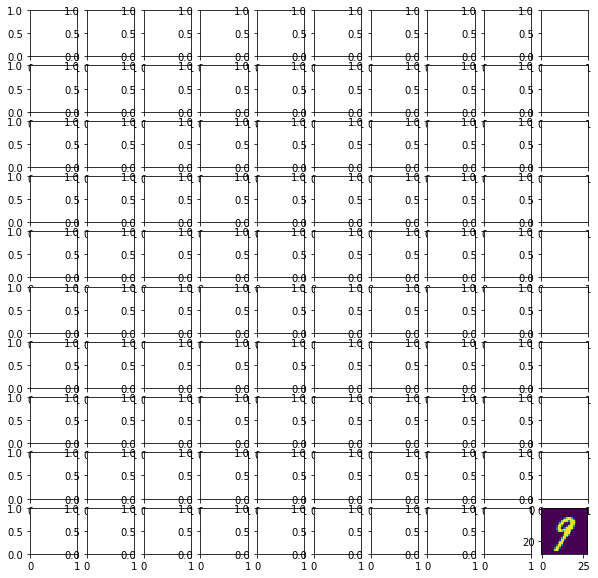

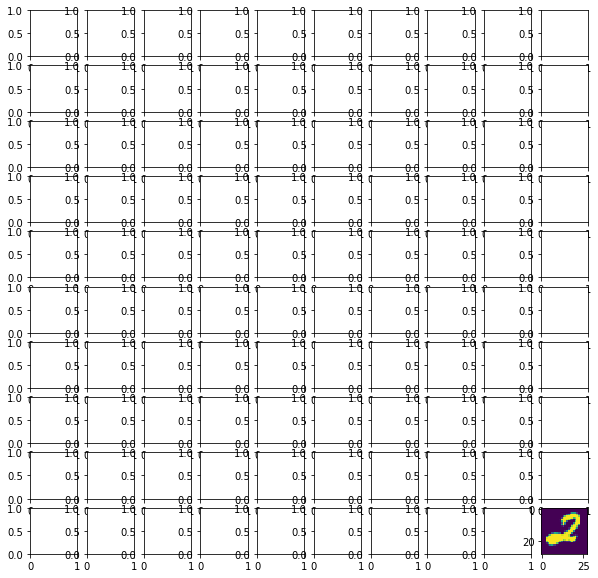

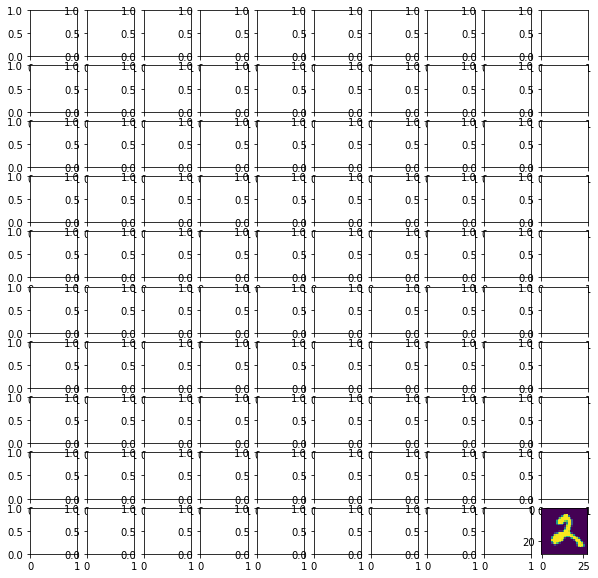

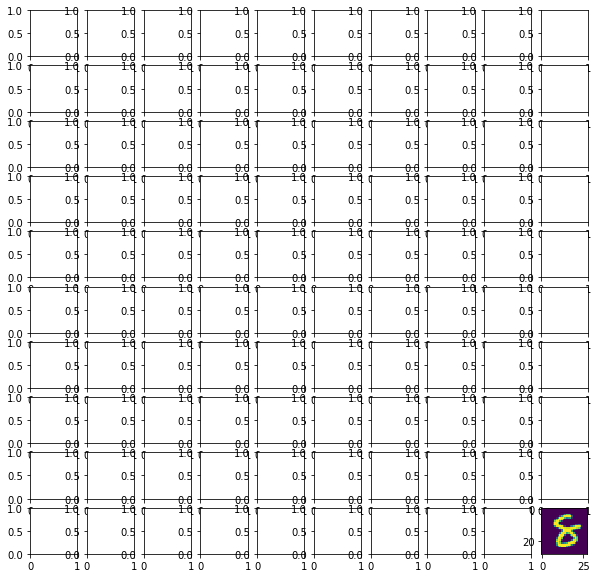

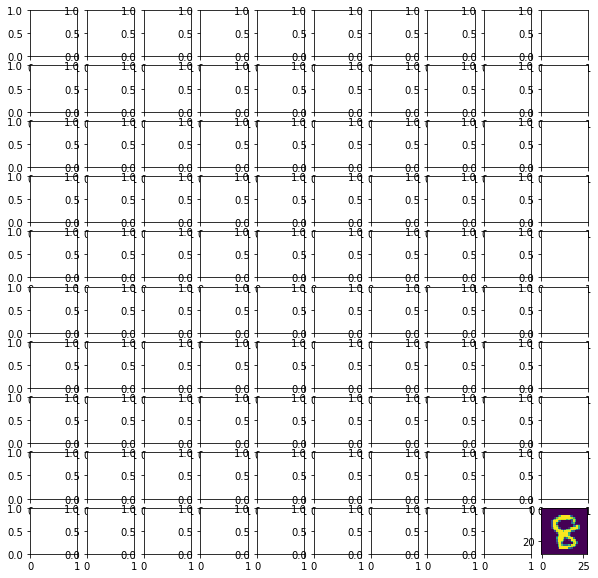

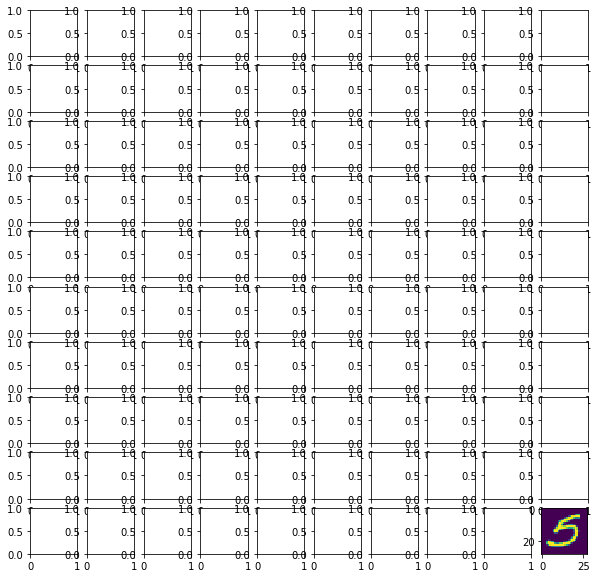

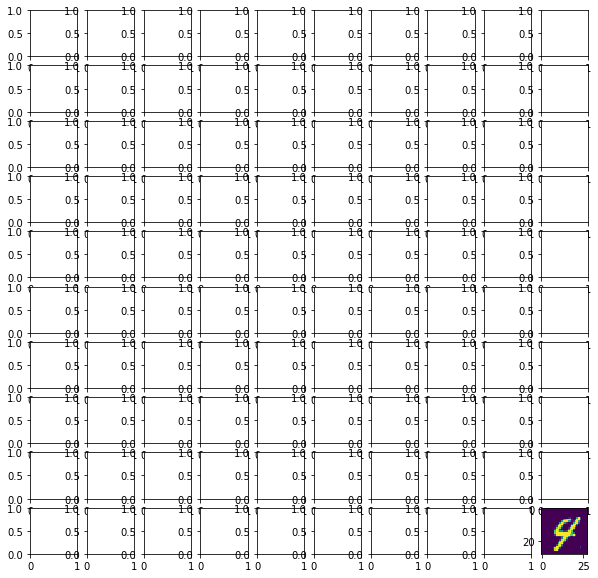

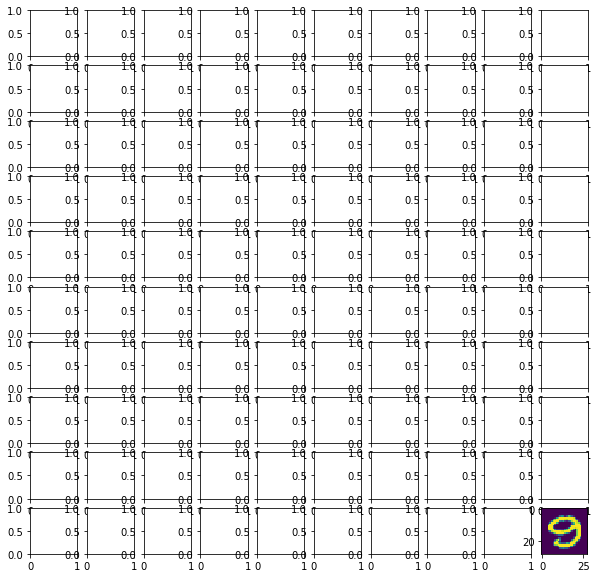

In [ ]:
#PLotting Number Data
#Not printing out an array on the digits some help
for i in range(10):
    for j in range(10):
        temprandom = random.randint(1,500)
        plot.subplots(10,10,figsize=(10,10))
        plot.imshow(X.values[temprandom].reshape((28,28)))
        plot.imshow 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Random-Forest estimators = 100
my_RandomForest = RandomForestClassifier(n_estimators = 100, bootstrap = True, random_state=3)
my_RandomForest.fit(X_train, y_train)
y_predict = my_RandomForest.predict(X_test)
print(y_predict)
print(y_test.values)
score = accuracy_score(y_test, y_predict)
print('Random Forest Accuracy: ',score)

In [ ]:
#Random-Forest estimators = 700
my_RandomForest = RandomForestClassifier(n_estimators = 700, bootstrap = True)
my_RandomForest.fit(X_train, y_train)
y_predict = my_RandomForest.predict(X_test)
temp = y_test.values
counter = 0
print(y_predict)
print(y_test.values)
for i in range(len(y_predict)):
    if y_predict[i] == temp[i]:
        counter = counter + 1
print(counter)
score = accuracy_score(y_test, y_predict)
print('Random Forest Accuracy: ',score)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
#Random-Forest estimators = 20
my_RandomForest = RandomForestClassifier(n_estimators = 20, bootstrap = True,random_state=4)
my_RandomForest.fit(X_train, y_train)
y_predict = my_RandomForest.predict(X_test)
temp = y_test.values
counter = 0
print(y_predict)
print(y_test.values)
for i in range(len(y_predict)):
    if y_predict[i] == temp[i]:
        counter = counter + 1
print(counter)
score = accuracy_score(y_test, y_predict)
print('Random Forest Accuracy: ',score)

In [ ]:
#Data Reset
digi_train_df = pd.read_csv('train.csv')
digi_test_df = pd.read_csv('test.csv')
X = digi_train_df.iloc[:, 1:]
y = digi_train_df.iloc[:, 0]

In [ ]:
#K = 3 KNN Accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print('KNN (with k=3) Accuracy: ',accuracy)

In [ ]:
#Decision Tree Randon State 5
my_decisiontree = DecisionTreeClassifier(random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
my_decisiontree.fit(X_train, y_train)
y_predict = my_decisiontree.predict(X_test)
score = accuracy_score(y_test, y_predict)
print('Decision Tree Randon State 5 Accuracy: ',score)

In [ ]:
# Logistic Regression
my_logreg = LogisticRegression()
my_logreg.fit(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
my_logreg.fit(X_train, y_train)
y_predict = my_logreg.predict(X_test)
score = accuracy_score(y_test, y_predict)
print('Logistic Regression Accuracy: ', score)

In [ ]:
#Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)
my_logreg = LogisticRegression()
my_logreg.fit(X_train, y_train)
y_predict_lr = my_logreg.predict(X_test)
print(y_predict_lr)
score_lr = accuracy_score(y_test, y_predict_lr)
print('Logistic Regression Predict: ', score_lr)

In [ ]:
#Data Reset
digi_train_df = pd.read_csv('train.csv')
digi_test_df = pd.read_csv('test.csv')
X = digi_train_df.iloc[:, 1:]
preprocessing.scale(X)
y = digi_train_df.iloc[:, 0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=4)

In [ ]:
#LinearRegression Use Linear Regression to train a linear model on the training set.
my_linreg = LinearRegression()
# fitting the model to the training data:
my_linreg.fit(X_train, y_train)
my_linreg.fit(X_test, y_test)
# printing Theta0 using attribute 'intercept_':
print(my_linreg.intercept_)
# printing [Theta1, Theta2, Theta3] using attribute 'coef_':
print(my_linreg.coef_)

In [ ]:
# make predictions on the testing set
y_prediction = my_linreg.predict(X_test)
print('Linear Regression Predict: ', y_prediction)

In [ ]:
#calculating and reporting the RMSE
#I dont think we need this one becasue the result is stupid high
mse = metrics.mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)
print('RMSE: ',rmse)

In [ ]:
#Cross-Validation to evaluate the regression performance
#I dont think we need this one 
X = digi_train_df.iloc[:, 1:]
y = digi_train_df.iloc[:, 0]
my_linreg = LinearRegression()
mse_list = cross_val_score(my_linreg, X, y, cv=10, scoring='neg_mean_squared_error')

In [ ]:
# using numpy sqrt function to calculate rmse:
#I dont think we need this one
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)